In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
sns.set()

C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.2

In [2]:
df=pd.read_csv('stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].replace(to_replace=np.nan, value=df['bmi'].mean(), inplace=True)

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
countVar = [x for x in df.columns if x not in df.loc[:,df.dtypes==np.float].columns]

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


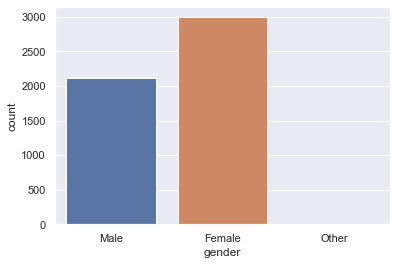

0    4612
1     498
Name: hypertension, dtype: int64


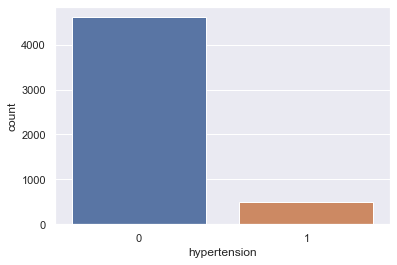

0    4834
1     276
Name: heart_disease, dtype: int64


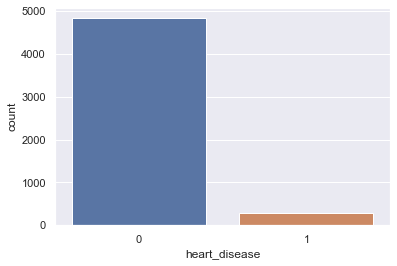

Yes    3353
No     1757
Name: ever_married, dtype: int64


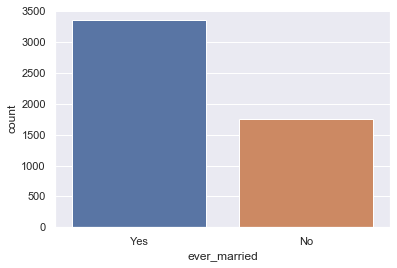

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


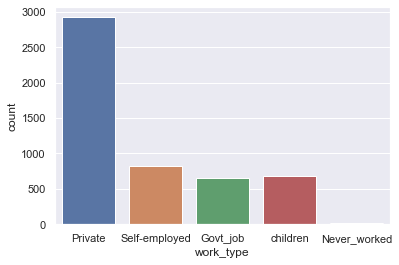

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


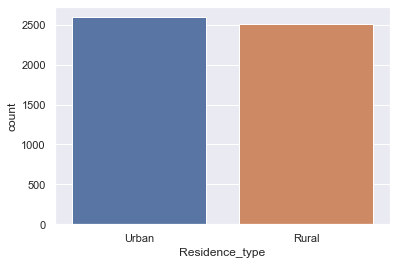

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


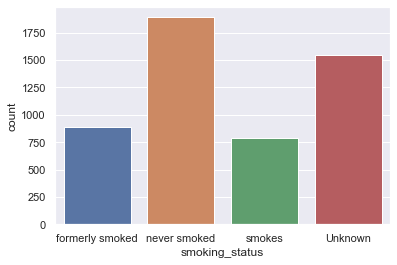

0    4861
1     249
Name: stroke, dtype: int64


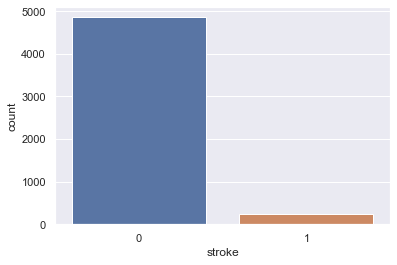

In [9]:
for i in countVar:
    print(df[i].value_counts())
    sns.countplot(data=df,x=i)
    plt.show()

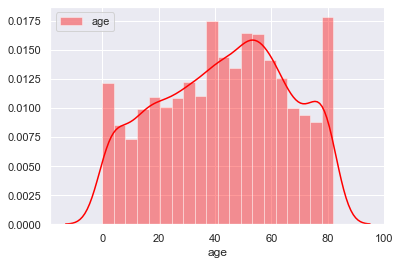

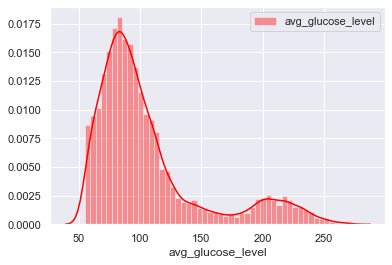

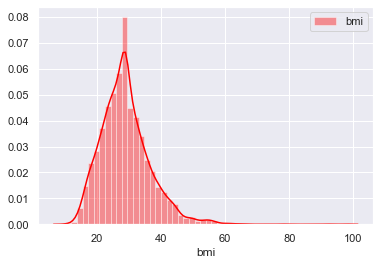

In [10]:
DistVar=[x for x in df.columns if x in df.loc[:,df.dtypes==np.float].columns]
for i in DistVar:
    sns.distplot(df[i],color='red',label=i,kde=True)
    plt.legend()
    plt.show()

In [11]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [12]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print('BEFORE OVERSAMPLING :')
print("# LABEL '0':",sum(Y_train==0))
print("# LABEL '1':",sum(Y_train==1))
sm = SMOTE()
X_train_resample, Y_train_resample = sm.fit_resample(X_train, Y_train.ravel())
print('AFTER OVERSAMPLING :')
print('SHAPE OF X_train',X_train_resample.shape)
print('SHAPE OF Y_train',Y_train_resample.shape)
print("# LABEL '0':",sum(Y_train_resample==0))
print("# LABEL '1':",sum(Y_train_resample==1))

BEFORE OVERSAMPLING :
# LABEL '0': 3404
# LABEL '1': 173


C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AFTER OVERSAMPLING :
SHAPE OF X_train (6808, 21)
SHAPE OF Y_train (6808,)
# LABEL '0': 3404
# LABEL '1': 3404


In [16]:
CompleteSummary=[]
allClf = []
allClf.append(['DECISION TREE', DecisionTreeClassifier(random_state=0)])
allClf.append(['RANDOM FOREST', RandomForestClassifier(random_state=0)])
allClf.append(['LOGISTIC REGRESSION', LogisticRegression(random_state=0)])
allClf.append(['XGB', XGBClassifier(eval_metric= 'error')])
allClf.append(['SVM', SVC(random_state=0,probability=True)])
allClf.append(['KNN', KNeighborsClassifier()])

In [17]:
def apply_model(model):
    clf=model[1]
    clf.fit(X_train_resample, Y_train_resample)
    Y_pred = clf.predict(X_test)
    confmat = confusion_matrix(Y_test, Y_pred) 
    accuracies = cross_val_score(estimator = clf, X = X_train_resample, y = Y_train_resample, cv = 5)   
    roc = roc_auc_score(Y_test, Y_pred)  
    precision = precision_score(Y_test, Y_pred)  
    recall = recall_score(Y_test, Y_pred) 
    f1 = f1_score(Y_test, Y_pred)  
    summary=[]
    print(model[0])
    summary.append(model[0])
    print('CONFUSION MATRIX :')
    ax = sns.heatmap(confmat, annot=True)
    ax.set_ylim([0,2])
    plt.show()
    print('ACCURACY SCORE :',accuracy_score(Y_test, Y_pred)*100)
    summary.append(accuracy_score(Y_test, Y_pred)*100)
    print('K-F VALIDATION MEAN ACCURACY :',accuracies.mean()*100)
    summary.append(accuracies.mean()*100)
    print('ROC AUC SCORE :',roc)
    summary.append(roc)
    print('F1 :',f1)
    summary.append(f1)
    print('PRECISION :',precision)
    summary.append(precision)
    print('RECALL :',recall)
    summary.append(recall)
    CompleteSummary.append(summary)
    yp = clf.predict_proba(X_test)[:,1]
    fpr,tpr,th = roc_curve(Y_test, yp)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()
    print('x'.center(50,'-'))    

DECISION TREE
CONFUSION MATRIX :


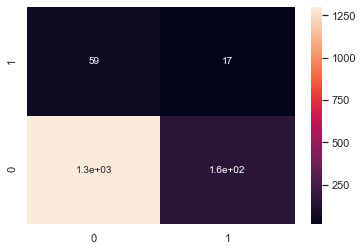

ACCURACY SCORE : 85.84474885844749
K-F VALIDATION MEAN ACCURACY : 90.04131237180918
ROC AUC SCORE : 0.5576211032041324
F1 : 0.1354581673306773
PRECISION : 0.09714285714285714
RECALL : 0.2236842105263158


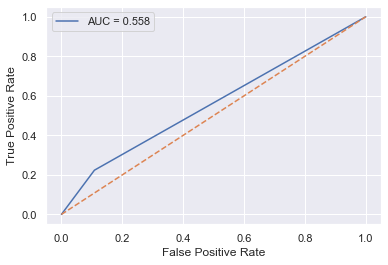

------------------------x-------------------------
RANDOM FOREST
CONFUSION MATRIX :


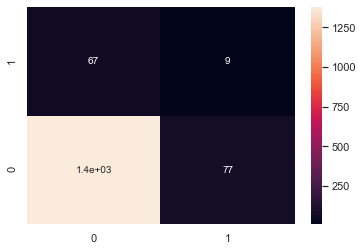

ACCURACY SCORE : 90.60665362035225
K-F VALIDATION MEAN ACCURACY : 95.69627368664095
ROC AUC SCORE : 0.5327863670844923
F1 : 0.1111111111111111
PRECISION : 0.10465116279069768
RECALL : 0.11842105263157894


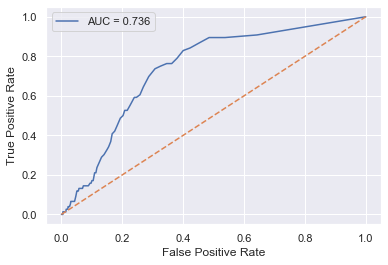

------------------------x-------------------------
LOGISTIC REGRESSION
CONFUSION MATRIX :


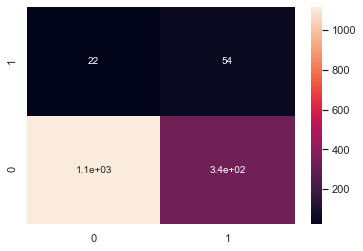

ACCURACY SCORE : 76.38617090671886
K-F VALIDATION MEAN ACCURACY : 79.84714746110713
ROC AUC SCORE : 0.7385850521980999
F1 : 0.2297872340425532
PRECISION : 0.13705583756345177
RECALL : 0.7105263157894737


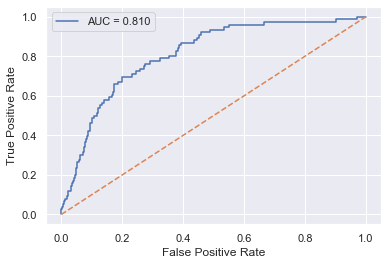

------------------------x-------------------------


C:\Users\m\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB
CONFUSION MATRIX :


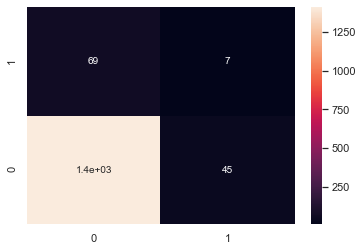

ACCURACY SCORE : 92.56360078277886
K-F VALIDATION MEAN ACCURACY : 95.60857795457906
ROC AUC SCORE : 0.5306099411190983
F1 : 0.109375
PRECISION : 0.1346153846153846
RECALL : 0.09210526315789473


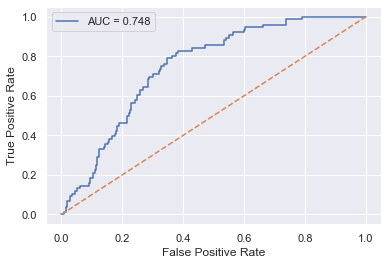

------------------------x-------------------------
SVM
CONFUSION MATRIX :


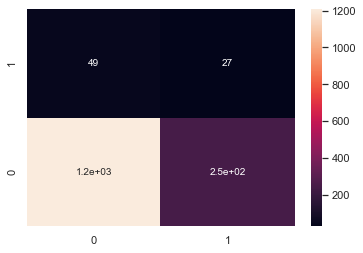

ACCURACY SCORE : 80.6914546640574
K-F VALIDATION MEAN ACCURACY : 89.48305049086089
ROC AUC SCORE : 0.5928683668677527
F1 : 0.1542857142857143
PRECISION : 0.09854014598540146
RECALL : 0.35526315789473684


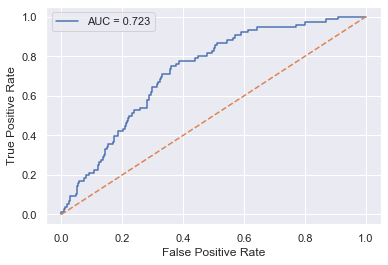

------------------------x-------------------------
KNN
CONFUSION MATRIX :


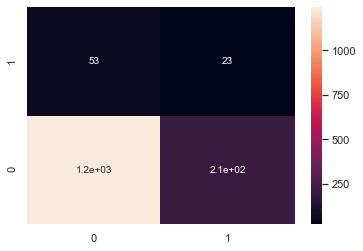

ACCURACY SCORE : 82.64840182648402
K-F VALIDATION MEAN ACCURACY : 90.71678961116308
ROC AUC SCORE : 0.5782203879637322
F1 : 0.14743589743589744
PRECISION : 0.09745762711864407
RECALL : 0.3026315789473684


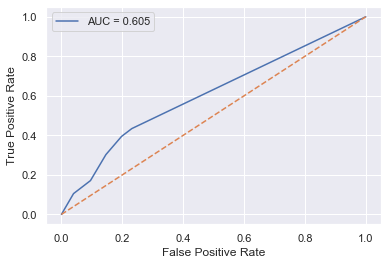

------------------------x-------------------------


[None, None, None, None, None, None]

In [18]:
list(map(apply_model,allClf))

In [19]:
summary_df = pd.DataFrame(CompleteSummary, columns= ['Model Name', 'Accuracy Score', 'K-F Valid Mean Accuracy','ROC AUC Score', 'F1', 'Precision', 'Recall'])
summary_df.sort_values(by= ['Accuracy Score'], inplace= True, ascending= False)
summary_df

,Model Name,Accuracy Score,K-F Valid Mean Accuracy,ROC AUC Score,F1,Precision,Recall
3,XGB,92.563601,95.608578,0.530610,0.109375,0.134615,0.092105
1,RANDOM FOREST,90.606654,95.696274,0.532786,0.111111,0.104651,0.118421
0,DECISION TREE,85.844749,90.041312,0.557621,0.135458,0.097143,0.223684
5,KNN,82.648402,90.716790,0.578220,0.147436,0.097458,0.302632
4,SVM,80.691455,89.483050,0.592868,0.154286,0.098540,0.355263
2,LOGISTIC REGRESSION,76.386171,79.847147,0.738585,0.229787,0.137056,0.710526


In [20]:
X_train_resample.shape

(6808, 21)

In [21]:
clf = Sequential()
clf.add(Dense(24, input_dim=21, activation='relu'))
clf.add(Dense(24, activation='relu'))
clf.add(Dense(1, activation='sigmoid'))
clf.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
clf_fit=clf.fit(X_train_resample, Y_train_resample,validation_split= 0.2, epochs=100, batch_size=12)




Train on 5446 samples, validate on 1362 samples
Epoch 1/100





5446/5446 [==============================] - 11s 2ms/step - loss: 0.5153 - acc: 0.7268 - val_loss: 0.6220 - val_acc: 0.6938
Epoch 2/100
5446/5446 [==============================] - 3s 588us/step - loss: 0.3960 - acc: 0.8098 - val_loss: 0.5337 - val_acc: 0.7746
Epoch 3/100
5446/5446 [==============================] - 3s 574us/step - loss: 0.3614 - acc: 0.8263 - val_loss: 0.5326 - val_acc: 0.7511
Epoch 4/100
5446/5446 [==============================] - 3s 581us/step - loss: 0.3424 - acc: 0.8415 - val_loss: 0.5063 - val_acc: 0.7871
Epoch 5/100
5446/5446 [==============================] - 3s 576us/step - loss: 0.3290 - acc: 0.8487 - val_loss: 0.4793 - val_acc: 0.8018
Epoch 6/100
5446/5446 [==============================] - 3s 581us/step - loss: 0.3163 - acc: 0.8540 - val_loss: 0.4383 - val_acc: 0.8267
Epoch 7/100
5446/5446 [==============================] - 3s 598us/step - loss: 0.3043 - acc: 0.8625 - val_loss: 0.4136 - va

5446/5446 [==============================] - 4s 670us/step - loss: 0.1480 - acc: 0.9434 - val_loss: 0.2046 - val_acc: 0.9369
Epoch 49/100
5446/5446 [==============================] - 3s 541us/step - loss: 0.1449 - acc: 0.9436 - val_loss: 0.2212 - val_acc: 0.9200
Epoch 50/100
5446/5446 [==============================] - 3s 545us/step - loss: 0.1424 - acc: 0.9429 - val_loss: 0.1250 - val_acc: 0.9611
Epoch 51/100
5446/5446 [==============================] - 3s 545us/step - loss: 0.1434 - acc: 0.9431 - val_loss: 0.1322 - val_acc: 0.9596
Epoch 52/100
5446/5446 [==============================] - 3s 541us/step - loss: 0.1414 - acc: 0.9433 - val_loss: 0.1644 - val_acc: 0.9530
Epoch 53/100
5446/5446 [==============================] - 3s 536us/step - loss: 0.1403 - acc: 0.9438 - val_loss: 0.2532 - val_acc: 0.8935
Epoch 54/100
5446/5446 [==============================] - 3s 550us/step - loss: 0.1385 - acc: 0.9436 - val_loss: 0.1817 - val_acc: 0.9405
Epoch 55/100
5446/5446 [=======================

In [23]:
Y_pred = clf.predict_classes(X_test)
print('Accuracy :',accuracy_score(Y_pred,Y_test)*100)

Accuracy : 88.19308545335942


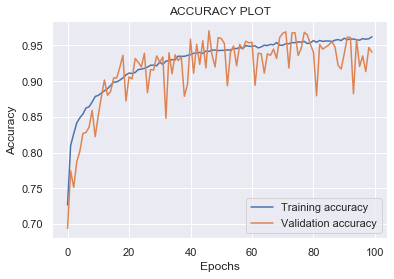

In [24]:
plt.plot(clf_fit.history['acc'],label='Training accuracy')
plt.plot(clf_fit.history['val_acc'],label='Validation accuracy')
plt.title('ACCURACY PLOT')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

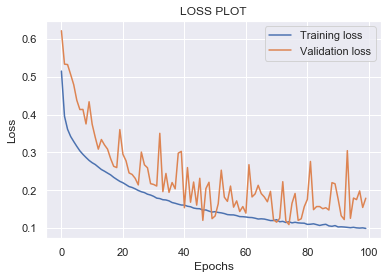

In [25]:
plt.plot(clf_fit.history['loss'],label='Training loss')
plt.plot(clf_fit.history['val_loss'],label='Validation loss')
plt.title('LOSS PLOT')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()